# Project: Investigate Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


#### Questions

<ol>
    <li>How many movies are made per year? (Which year had the most movies?)</li>
    <li>Which genre has been produced the most?</li>
    <li>What are the most popular movies?</li>
    <li>What is the average runtime per year?</li>
</ol>

In [55]:
# Libraries being used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### What are the General Properties of the Movie Dataset?

In [56]:
#Loading Movie data and viewing the first 2 lines

movies = pd.read_csv('tmdb-movies-5.csv')
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [57]:
#Looking up data types and dataset info

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
#Looking up some general stats of the data

movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
movies.count()

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

In [58]:
#Checking to see if there are any duplicates within this dataset.

#sum(movies.duplicated())
dup_rows = movies[movies.duplicated()]
dup_rows.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [59]:
#Checking to see all of the null values.

movies.isna().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Observations

<ol>
    <li>This data set has 10866 Rows and 21 Columns.</li>
    <li>There is one duplicate within this dataset.</li>
    <li>Various categories of the dataset has null values. (imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production companies.)</li>
    <li>Will need to change 'release_date' from object to datetime.</li>
    </li>
    
  
</ol>
    

### Data Cleaning


#### Dropping Duplicates Rows

In [60]:
#Found that there was one duplicate row.  Removing the duplicate row from the dataset

movies.drop_duplicates(inplace = True)

#Shows that 1 entry has been dropped.
movies.shape

(10865, 21)

#### Filling Null values with zero

In [15]:
#Decided to fill all the null values with zero.

movies.fillna(0)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

#### Correcting data types

In [63]:
# Change 'release_date' from object to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

# release_date is now datetime64
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

#### Dropping columns that are not needed

In [64]:
# Remove columns of data that are not needed for my analysis.
# Removing (imdb_id, homepage, tagline, overview) 

movies.drop(['imdb_id','homepage','tagline', 'overview'],axis =1,inplace = True)
movies.head(2)


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis



#### Question 1 - How many movies are made per year? (Which year had the most movies?)?

In [65]:
#Investigation to see how many movies have been made per year?
#Need to group movies by year, count movies per year, then sort descending

movies_count = movies.groupby('release_year').count()['id'].sort_values(ascending=False)
movies_count.head(10)


#Below shows the top ten years of movie making.


release_year
2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
Name: id, dtype: int64

In [19]:
# show basic statistics of the Movie Counts per year.

movies_count.describe()

count     56.000000
mean     194.017857
std      187.983025
min       31.000000
25%       47.000000
50%      128.500000
75%      248.000000
max      700.000000
Name: id, dtype: float64

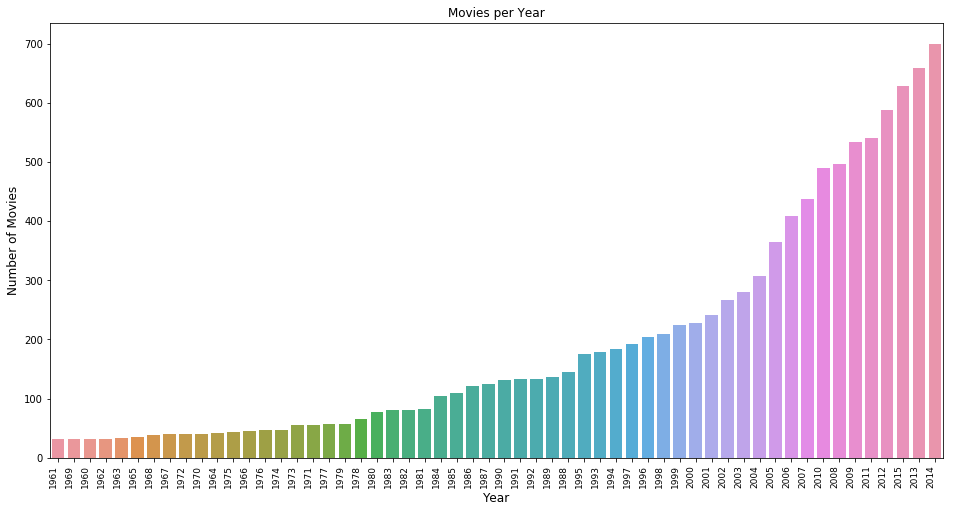

In [31]:
# Want to see the plot for how many movies were made per year.
plt.figure(figsize = (16,8))
movies_count_plot = sns.countplot(x = 'release_year', data = movies, 
                                  order = movies.groupby('release_year').count()['id'].sort_values(ascending=True).index);

# Create labels for the plot
plt.title('Movies per Year',fontsize = 12);
plt.xlabel('Year', fontsize = 12);
plt.ylabel('Number of Movies',fontsize = 12);

#Rotate the x axis labels 90 degrees so that they can be read.
movies_count_plot.set_xticklabels(movies_count_plot.get_xticklabels(),rotation = 90, ha= 'right', fontsize = 9);


In [20]:
#showing the percentage difference of how many movies have been per year.

movies_count_2 = movies.groupby('release_year').count()['id']
movies_count_diff = movies_count_2.pct_change()
movies_count_diff.tail(10)

release_year
2006    0.120879
2007    0.073529
2008    0.132420
2009    0.074597
2010   -0.082552
2011    0.104294
2012    0.088889
2013    0.120748
2014    0.062215
2015   -0.101429
Name: id, dtype: float64

In [21]:
# Want to see the average difference of movies being made per year.

movies_count_diff.mean()

0.06551269395138615

#### Answer to Question 1

We see that the average increase of movies being made per year from 1960 through 2015, is 6.6%.  Within that same time frame 2014 has produced the most movies with 700 movies being made that year.

#### Question 2  - Which genre has been produced the most?


In [22]:
# Genres have multiple values in the same column.  These need to be separated for analysis.
# Once the data is separated, I want to see the total counts of each genre.

def split_data(x):
    data_sep = movies[x].str.cat(sep = '|')
    data_series = pd.Series(data_sep.split('|'))
    counts = data_series.value_counts(ascending=False)
    return counts

genres_count = split_data('genres')

genres_count.head(10)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
dtype: int64

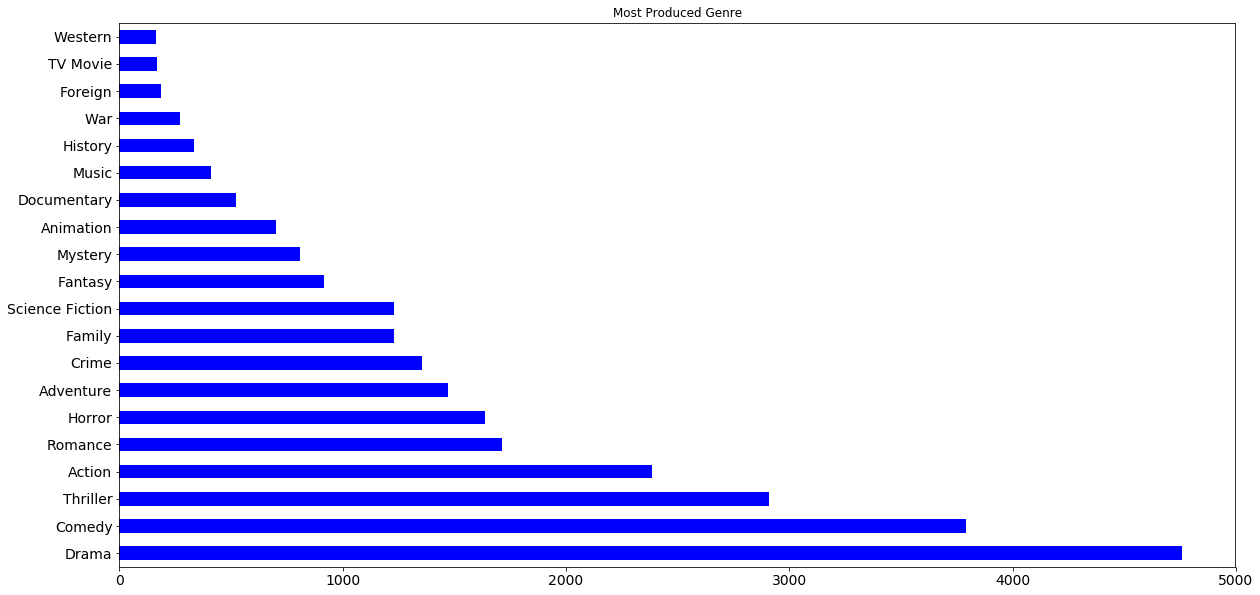

In [23]:
# Want to see the plot to see how many movies have been made per genre.

genres_count.plot(kind='barh', title='Most Produced Genre', color = '#0000FF', fontsize = 14, figsize=(20,10), )

In [24]:
# Want to see the percentage of the total.

genres_per = genres_count/genres_count.sum()
print(genres_per)

Drama              0.176591
Comedy             0.140716
Thriller           0.107846
Action             0.088444
Romance            0.063513
Horror             0.060731
Adventure          0.054572
Crime              0.050232
Family             0.045669
Science Fiction    0.045595
Fantasy            0.033983
Mystery            0.030050
Animation          0.025932
Documentary        0.019291
Music              0.015136
History            0.012391
War                0.010017
Foreign            0.006975
TV Movie           0.006196
Western            0.006121
dtype: float64


#### Answer to Question 2

Drama movies have been produced the most from 1960 through 2015, with 4760 drama movies produced.  Drama makes about 18 percent of all movies.

#### Question 3  - What are the most popular movies? 

In [67]:
# I want to see which movie has the highest popularity score.

pop_movies = movies.sort_values(by = 'popularity', ascending = False)[0:10]
pop_movies.head(5)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08
630,118340,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


Text(0.5, 1.0, 'Top 10 Popular Movies')

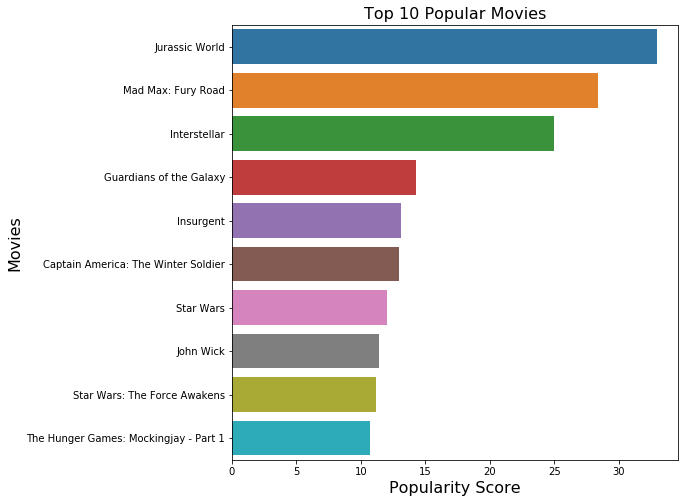

In [26]:
# Want to see the plot to see which movie has the highest popularity score.
plt.figure(figsize = (8,8)) 
movies_pop_plot = sns.barplot(x = 'popularity' , y = 'original_title', data = pop_movies) 

# Create labels for the plot
plt.xlabel('Popularity Score' , fontsize = 16)
plt.ylabel('Movies', fontsize = 16)
plt.title('Top 10 Popular Movies',fontsize = 16)


#### Answer to Question 3

Jurassic World is the most popular movie from 1960 through 2015, with a popularity score of about 33.

#### Question 4  -  What is the average runtime per year?

In [68]:
# Want to see want is the average runtime per movie per year?

movies_runtime = movies.groupby('release_year')['runtime'].mean()
movies_runtime.head(10)



release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
1965    118.171429
1966    106.891304
1967    104.950000
1968    107.282051
1969    106.580645
Name: runtime, dtype: float64

In [54]:
movies_runtime.describe()

count     56.000000
mean     105.705088
std        5.522549
min       96.044006
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64

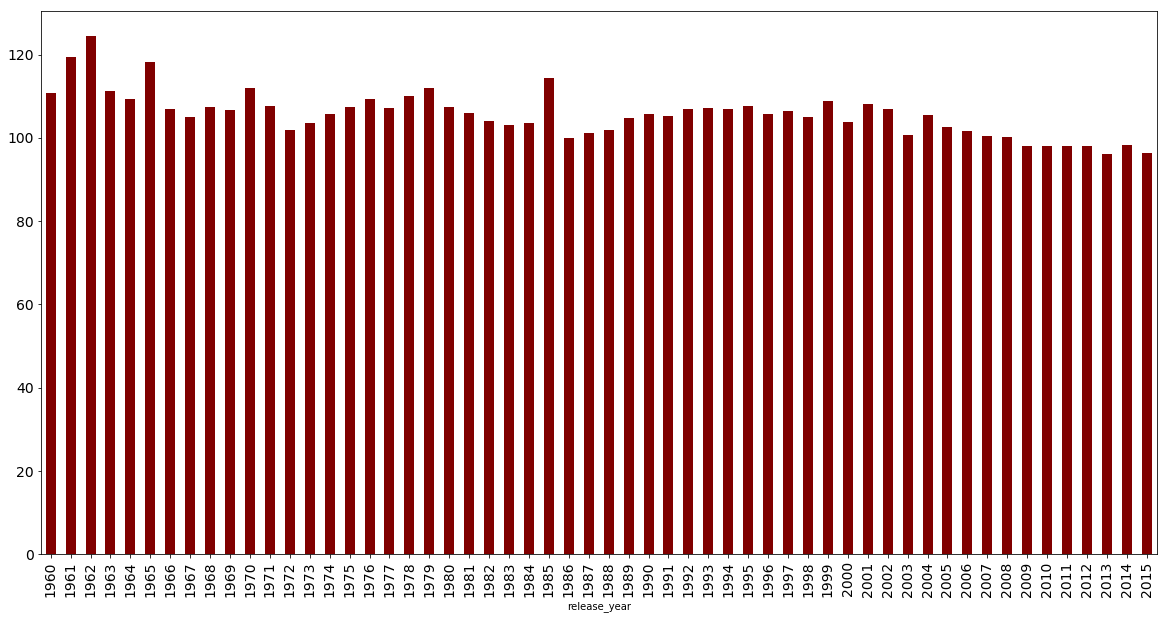

In [53]:
movies_runtime.plot(kind='bar', color = '#800000', fontsize = 14, figsize=(20,10))

#### Answer to Question 4

We can see that the average runtime has not varied too much throughout the years.  The overall runtime average from 1960 to 2015 is 105.8 minutes.

<a id='conclusions'></a>
## Conclusions

<p>
As I conducted my analysis on the tmdb movies dataset, I made various discoveries.
<ol>
    <li>We see that the average increase of movies being made per year from 1960 through 2015, is 6.6%.  Within that same time frame 2014 has produced the most movies with 700 movies being made that year.</li>
    <li>Drama movies have been produced the most from 1960 through 2015, with 4760 drama movies produced.  Drama makes about 18% of all movies.</li>
    <li>Jurassic World is the most popular movie from 1960 through 2015, with a popularity score of about 33.</li>
    <li>We can see that the average runtime has not varied too much throughout the years.  The overall runtime average from 1960 to 2015 is 105.8 minutes.</li>
<ol>
   



Even though there is a lot of data in this dataset, I do have some concerns.  Many categories have null values, which can skew our analysis and make this dataset unreliable.  Popularity has a score, but I do not know how that score is generated.  So I do not know how reliable that score is.

## References

<ul>
    <li><a href="https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/">Splitting Columns in Pandas</a></li>
    <li><a href="https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python">Pandas Tutorial - Datacamp</a></li>
    <li><a href="https://www.linkedin.com/learning/python-for-data-science-essential-training/welcome?u=2045532">Pandas Training - Lynda Videos</a></li>
    